<a href="https://colab.research.google.com/github/GladysJoseph/github_python_repo/blob/main/AutoMPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Author: Gladys Joseph**

# **Elective Project**



















# ** Auto MPG **
# **July 20, 2023**




### ** Exploratory Data Analysis**  

**Context**

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

As a Data Scientist at the school of Great Learning I am analyzing this case on a business SecondLIfe which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

**Objective & Goal**

The objective of this problem is to explore the data, extract meaningful insight from the data.  The goal is to develop a model that can learn patterns, trends, anomalies, and relationships between variablesto make prediction o  that can accurately predict the fuel efficiency (measured in miles per gallon) of a vehicle based on certain features or attributes.

**Dataset**

There are 8 variables in the data:

**mpg**: miles per gallon
**cyl**: number of cylinders
**disp**: engine displacement (cu. inches) or engine size
**hp**: horsepower
**wt**: vehicle weight (lbs.)
**acc**: time taken to accelerate from 0 to 60 mph (sec.)
**yr**: model year
**car name**: car model name

Importing libraries

In [ ]:
import warnings

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

**Mount Google Drive**

In [ ]:

#Mount data drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the data**

In [ ]:

##uploading dataset and reading it through my drive

data = pd.read_csv('/content/drive/MyDrive/Great_Learning/auto-mpg.csv')


In [ ]:

 #Copying data to another variable to avoid any changes to the original data
data= data.copy()

In [ ]:

#Looking at head (observations)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [ ]:
#Checking the shape of the dataset -feature count and rows
data.shape

(398, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


Observations:

There are **398 observations and 8 variables** in the data.
All variables **except horsepower and car name are of numeric data type**.
mpg, displacement, and acceleration are  floats dtype
cylinders, weight, and model year are integ dtype
horsepower and car name are tow objects   



In [ ]:
#Checking for the misssing values in the dataset ...
# BELOW SHOWS THE COUNT OF MISSING VALUES
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [ ]:
data['car name'].nunique()

305

**Observation**

Data was checked to find any missing data and then Check for unique values in car name.  
There are 305 unique values in car name. This variable is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

Exploring Summary
Our dataset has a total of 398 records and 8 variables.
We have 95 car names that   in our dataset nor duplicated rows.
horsepower column have inconsistant data type that needs to be handled and casted to int.
origin would need to be parsed and casted into a categorical datatype.
No columns would need to be dropped.

**Data Preprocessing**

The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [ ]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

In [ ]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [ ]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [ ]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

**Observations:**

There are 6 observations where horsepower is ?:  Row- 32, Row- 126, Row-330, Row-336, Row-354, and Row-374.  We considered these values as missing values; therefere, they were changed to Nan (object), We imputed these missing values and change the data type of horsepower column.  Then changed the dtype from object to a float.

**Summary Stastistics**

In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Observation**

The model with the lowest minimum MPG of 9.0 was in 70, it also had a low horsepower least horsepower=46, the lowest acceleration of 8.0

The model with the highest MPG(which is great on gas), is a model grom 1982 where MPG is 46.6, it had 8 cylinders, its horsepower was 230, weight is 5140, and high acceleration of 24

##**Univariate**

**Plots and visualizations**

***Distribution and outliers in the data***

Create histograms to check the distribution of all the variables
Create boxplots to visualize the outliers for all the variables

In [ ]:
# we are going to define this code so we can re-use it for every feature.
def histogram_boxplot_fun (df, feature):                                                           #lastly            def histogram_boxplot_fun (df, feature, kde= False, bins = 23):
    fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
    sns.boxplot(data=df, x=feature, showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
    sns.histplot(data= df, x=feature, bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
    ax[1].axvline(df[feature].mean(), linestyle = '--', color = 'green') # enhance with median line and color
    ax[1].axvline(df[feature].median(), linestyle = '-.', color='black')

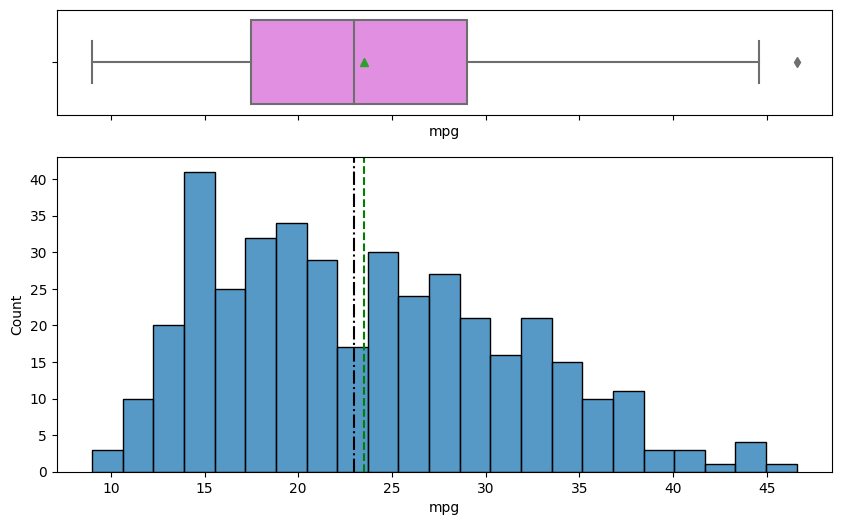

In [ ]:
from ipywidgets.widgets.widget_int import Color
# step 1-add fig ax for the 1st viz to the 1/3
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='mpg', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='mpg', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
#if you want to add vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(data['Goals_Scored'].mean()) this basic solid line
ax[1].axvline(data['mpg'].mean(), linestyle = '--', color = 'green') # enhance with median line and color
ax[1].axvline(data['mpg'].median(), linestyle ='-.', color='black')


#Visual 1

<ipython-input-18-0bf71be6efb9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

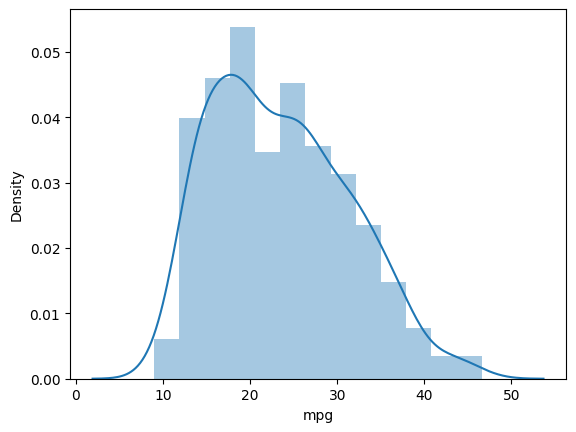

In [ ]:
sns.distplot(data['mpg'])
#Visual 2

In [ ]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


**Observations MPG**

Data Distribution Visual 1-Skewness is slight right of the mean, there are some outliers on the right side of the distribution.
Kurtosis of -0.51- the kurtosis is negative indicating the dataset has fewer extreme values.


Data Distribution Visual 2- Meadian line shows 23-24. Slightly skewed to the right


<ipython-input-20-cde654f49bd1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['displacement'])


<Axes: xlabel='displacement', ylabel='Density'>

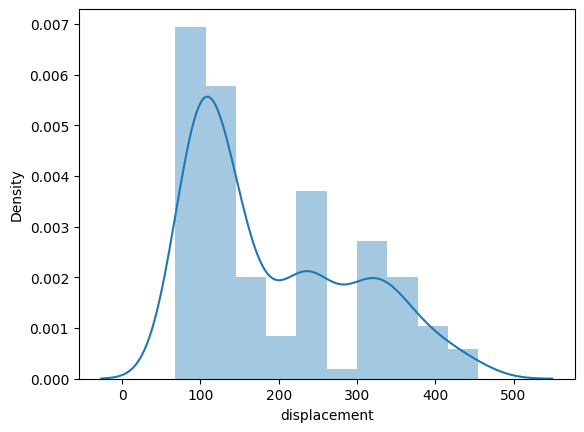

In [ ]:
sns.distplot(data['displacement'])
#Visual 3

**Observations**

 Visual 3

Displacement- Skewness to the right, Displacement shows at 250-300 the density is very low compare to the values in the dataset.

<Axes: xlabel='cylinders', ylabel='Count'>

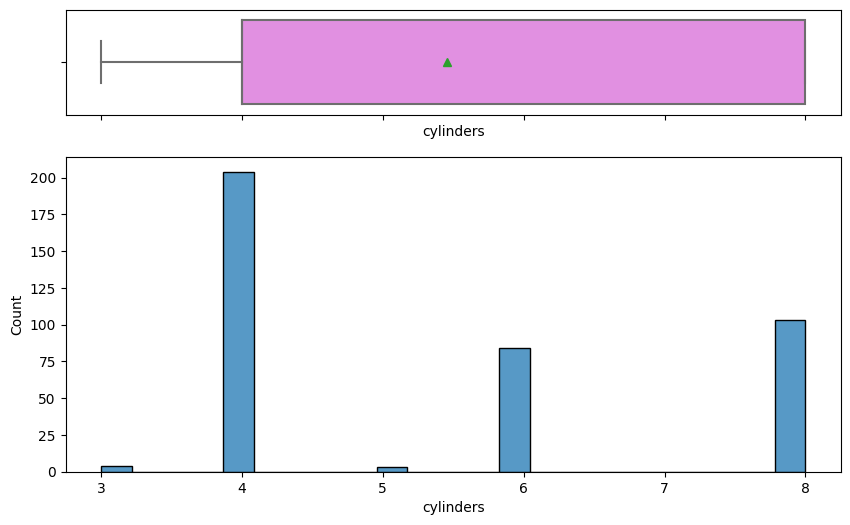

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='cylinders', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='cylinders', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['cylinders'].mean()) this basic solid line

#Visual 4


**Observation**

Visual 4

 Cylinders: The majority of vehicles have -(from highest to lowest) 4,8, 0r 6 cylinders. There were under 10 that have cylinders other than the ones previously mentioned, which are 3,5,7.

<Axes: xlabel='horsepower', ylabel='Count'>

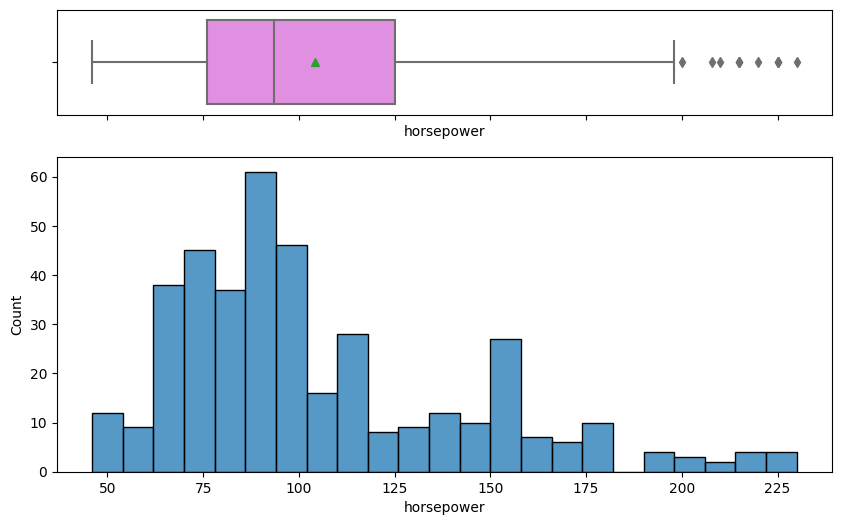

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='horsepower', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='horsepower', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line

**Observation**

horsepower: Data is skewed to the right. The most horsepower was at 60-120.  There are a few outliers from 185-225

<Axes: xlabel='weight', ylabel='Count'>

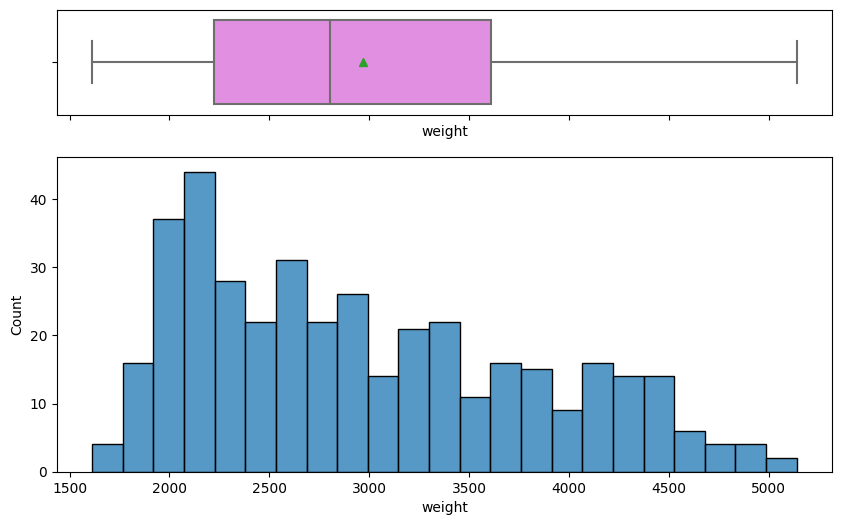

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='weight', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='weight', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['weight'].mean()) this basic solid line


**Observation**

Weight - disbursement is right skewed, no outliers.


<Axes: xlabel='acceleration', ylabel='Count'>

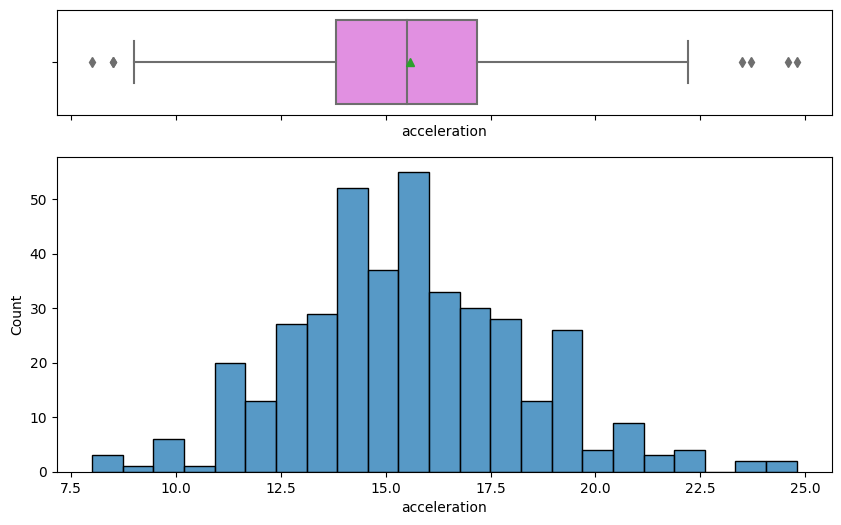

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='acceleration', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='acceleration', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['acceleration'].mean()) this basic solid line

**Observation**

data was almost semetrically distributed; however, there are a few outliers.

<Axes: xlabel='model year', ylabel='Count'>

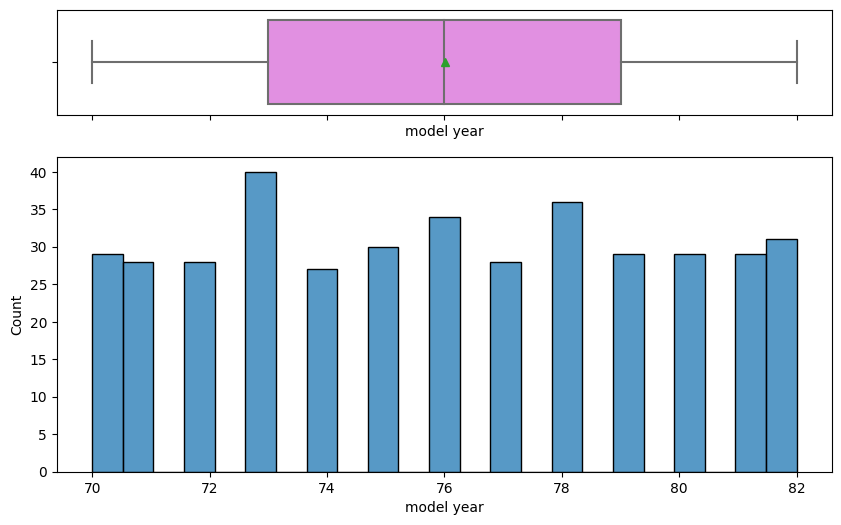

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='model year', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='model year', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['model year'].mean()) this basic solid line

**Observation**

Data os from 1970 to 82.  The year with the most count is 1973 followed by 1978

##**Checking for Correlation**

**Observation**

over 200 of the vehicles had 4 cylinders.

<Axes: >

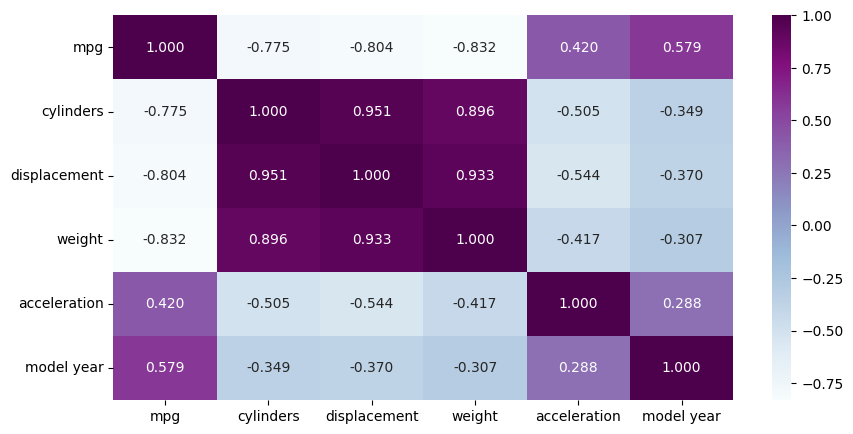

In [ ]:
from numpy.ma.core import correlate

# Plot the heatmap
num_var = ['mpg', 'cylinders','displacement','weight','acceleration','model year']
corr = data[num_var].corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, cmap = 'BuPu',
        fmt = ".3f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

#Visual 6

In [ ]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


**Observations**

**High correlations:**

MPG and Weight

cylinder and displacement, followed cylinder and weight

weight and displacement


##**Bivarite**



<ipython-input-28-b63b78780c9a>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')


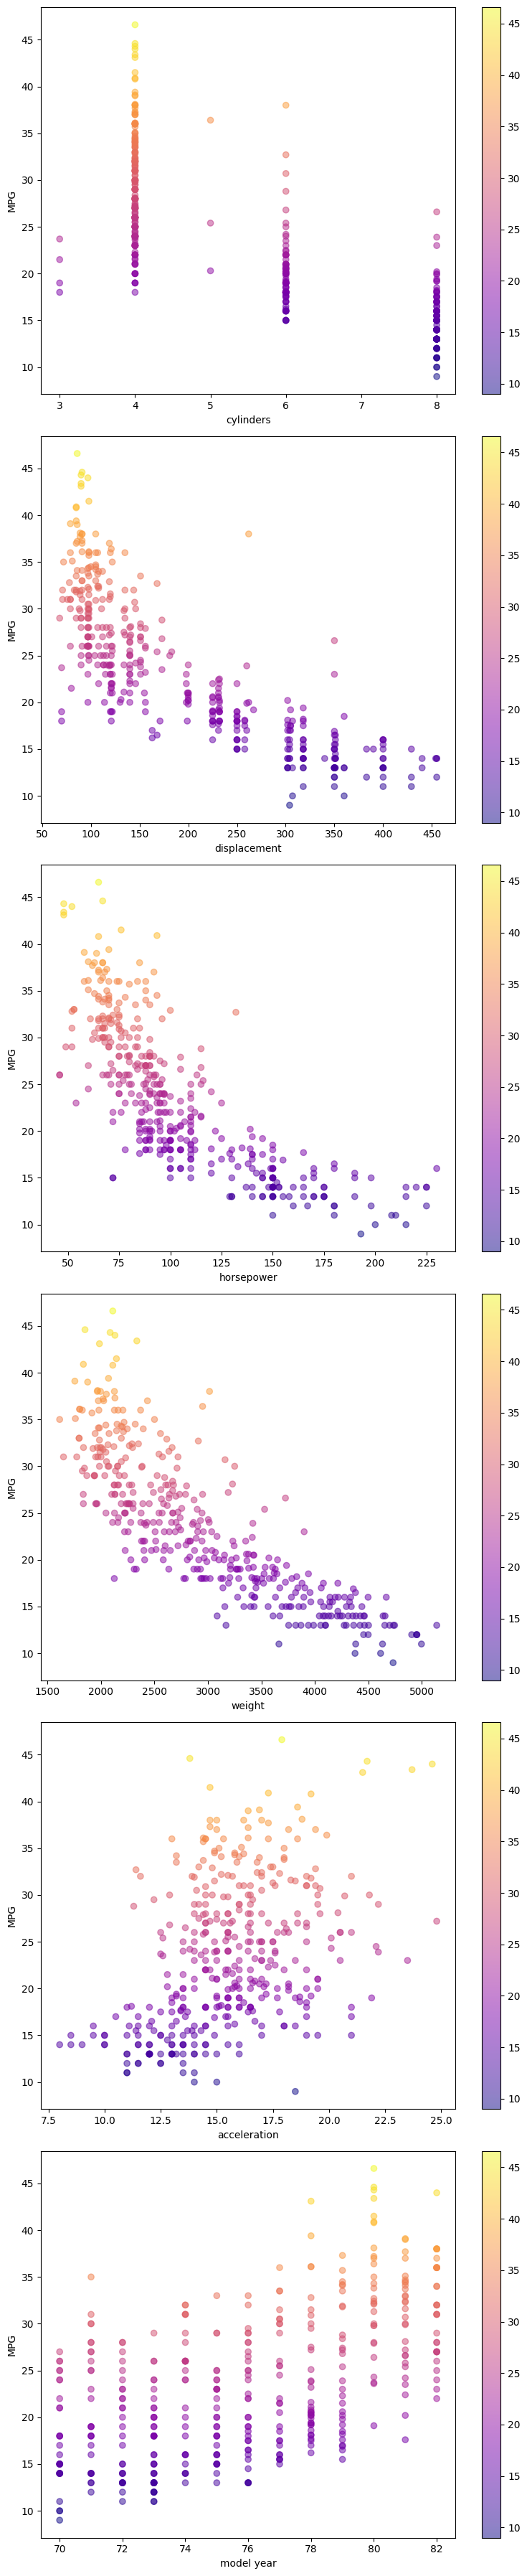

In [ ]:
# List of variables to plot against MPG
variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Set up the figure and plot each variable against MPG
fig, axs = plt.subplots(len(variables), 1, figsize=(8, 6 * len(variables)))

# Define a colormap for 'mpg'
cmap = plt.cm.get_cmap('plasma')

for i, var in enumerate(variables):
    ax = axs[i]
    sc = ax.scatter(data[var], data['mpg'], c=data['mpg'], cmap=cmap, alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel('MPG')
    fig.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()

# Visual 1

Observation

Visual 1: MPG vs Cylinders- concentration is around 20-25

Visual 2: MPG Vs displacement- high concentrations is when MPG are 23-34

Visual 3: MPG Vs horsepower -highest horsepower 80-105 when MPG is 18-24

Visual 4: MPG Vs weight - the lighter the vehicle the higher the MPG, weight of 3000 are primarily under 25 MPG. There are a few outliers.

Visual 5: MPG Vs acceleration- acceleration is high after 20 MPG

Visual 6: MPG Vs Model Year- MPG started to increase after 1975, In 1980 there was a major shift.

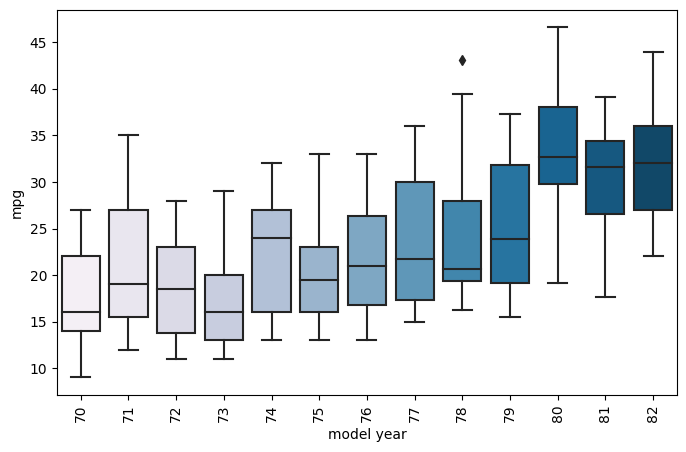

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x = 'model year', y = 'mpg', data = data, palette = 'PuBu')
plt.xticks(rotation = 90)
plt.show()

#Visual 7

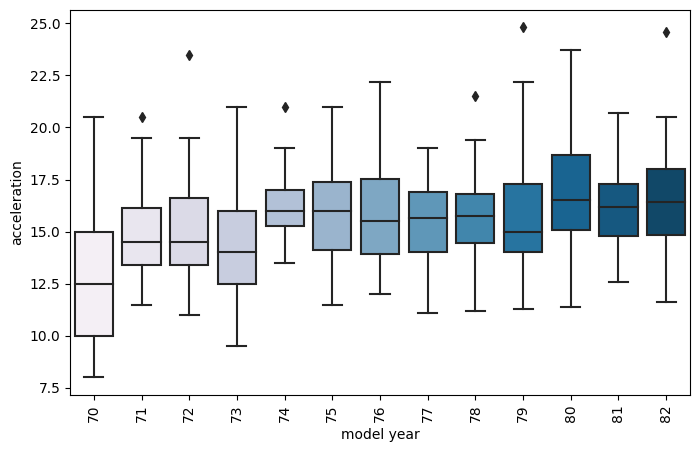

In [ ]:


plt.figure(figsize=(8,5))
sns.boxplot(x = "model year", y = "acceleration", data = data, palette = 'PuBu')
plt.xticks(rotation = 90)
plt.show()

#Visual 8

**Observation**

**MODEL YEAR & MPG**

Model year 70 & 73 had the median of 15; however for 1973, it had the least amount of vehicles.  The distribution of MPG of 1973's was from 12-28 MPG.

1980 vehicle had an MPG of 15- above 45+; median of MPG is 30.


**Model Year  and Acceleration**

Model year- 71, 72, 74, 78, 79, and 80 had outliers.  
1979 outlier acceleration is 25
1982 outlier acceleration is 24
1978 had an outlier, the MPG was over 40.
1980 distribution is 11-23 median is 15.

mpg
Skew: 0.46


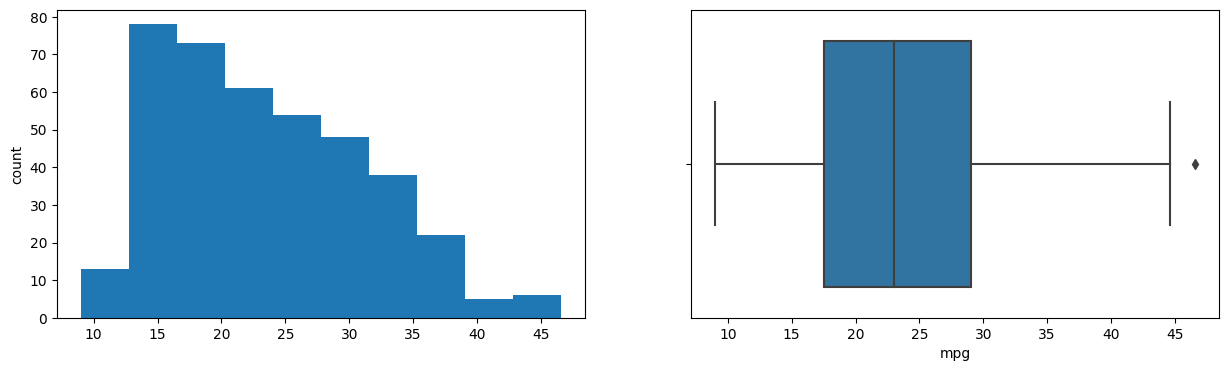

cylinders
Skew: 0.53


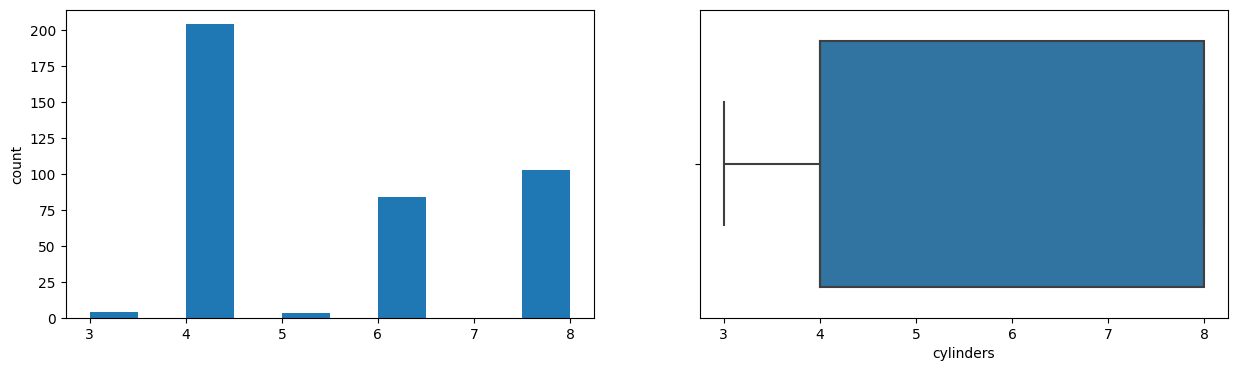

displacement
Skew: 0.72


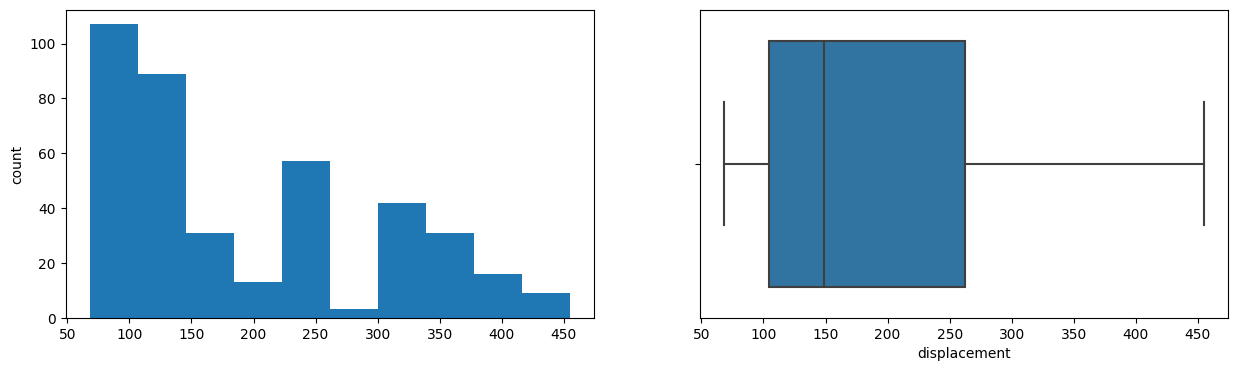

horsepower
Skew: 1.11


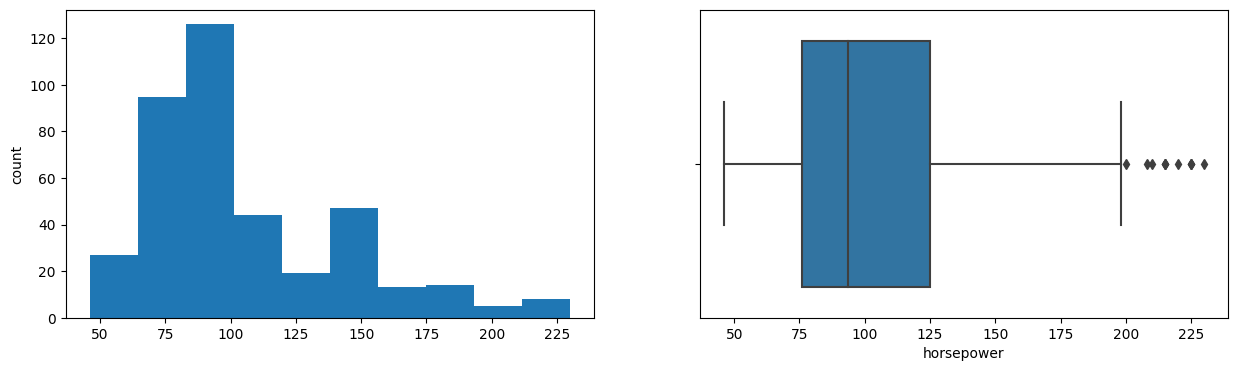

weight
Skew: 0.53


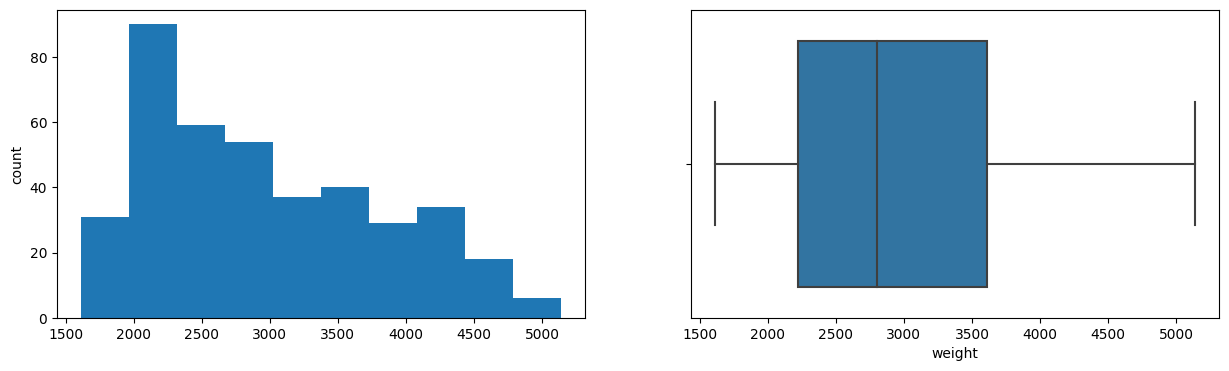

acceleration
Skew: 0.28


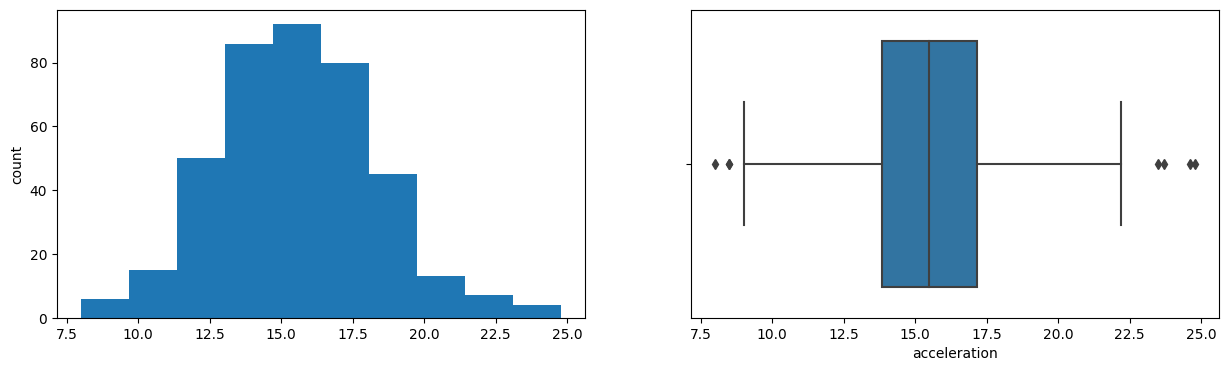

model year
Skew: 0.01


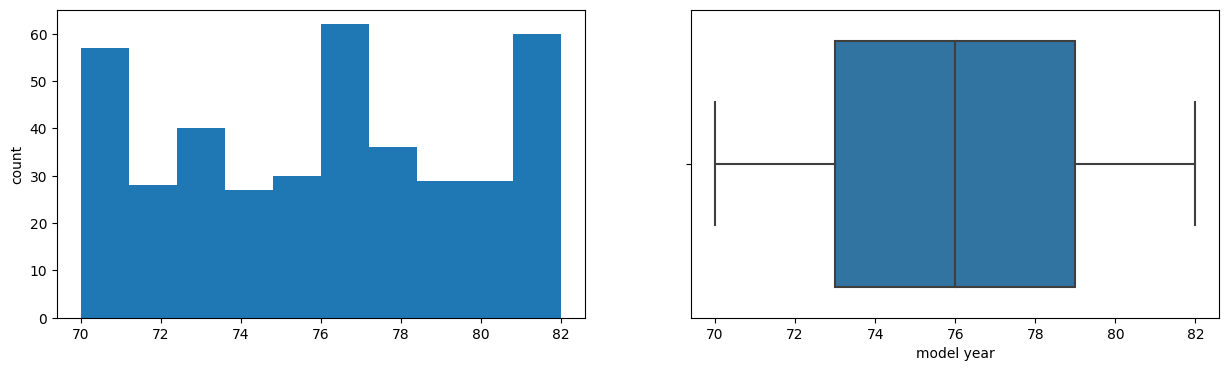

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a DataFrame containing the auto mpg data

for col in data.columns:
    print(col)

    print('Skew:', round(data[col].skew(), 2))

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 1)
    data[col].plot(kind='hist')  # Plotting a histogram
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])  # Creating a boxplot
    plt.show()

    #Visual 9

**Observation**

Created nine visuals to display the data in its various forms.

Visual 9 -

MPG:  skewness - right .46; mpg median 23; MPG - outlier above 45

Cylinder - skewness 0.54, majority of cylinder are 4

Acceleration- skewness .28,      Distribution is ( 9-22 ) outliers < 9  and > than 22.5

Horsepower- skewness 1.11; outtliers >200; median approx. 90


Model year from 1970- 82 , median year 76








Scaling the data

In [ ]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


Principal Component Analysis

In [ ]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 1
pca = PCA(n_components=n, random_state=1)

# Fit and transform the pca function on scaled data
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

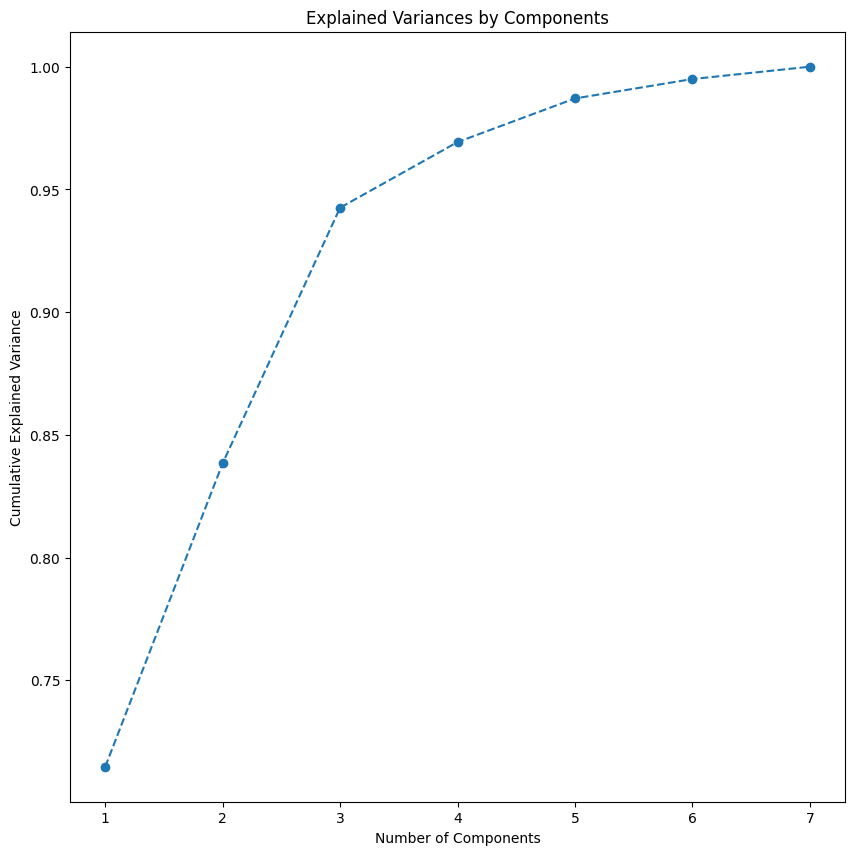

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

**Observation**

7 components-  3 of which can explain 94% of the variance.

In [ ]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:**___3 PCs explains  at least 90% of variance.

In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T



,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [ ]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observation**

**PC1:**

positive data captured vehicles with more Cylinders, high displacements, horsepower, and weight.

negative- lower MPG, Acceleration, model year

**PC2:**

Positive coefficient- acceleration negative- **Model year has a large negative** MPG, Cylinders, Displacements, horsepower, weight, model year

**PC3:**

positive - cylinders, displacement, weight, **and acceleration with the highest postive loading** negative- MPG, Horsepower, Model year

Interpret the coefficients of the first three principal components from the below DataFrame

Observations

#### **Visualize the data in 2 dimensions using the first two principal components**

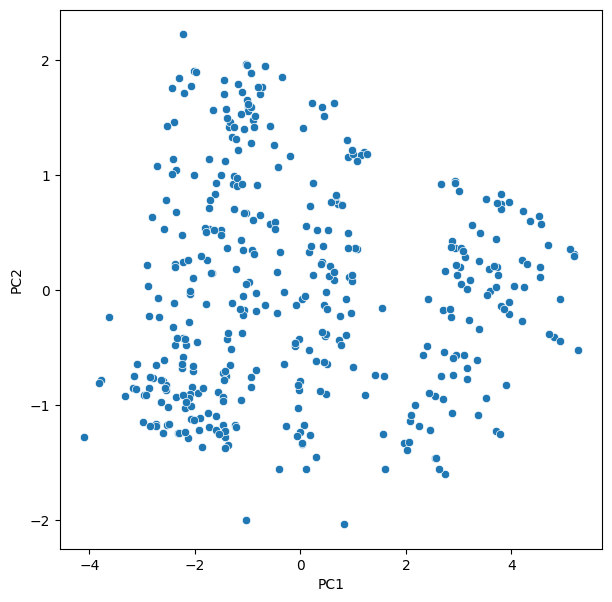

In [ ]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

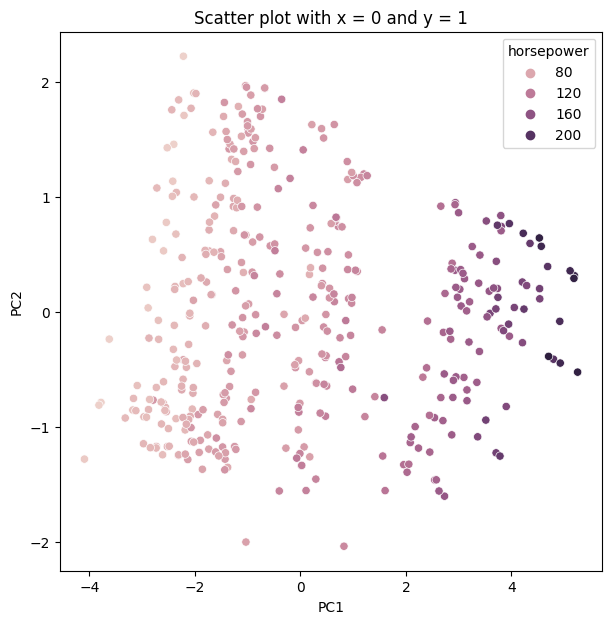

In [ ]:

#Two DataFrames 'df1' and 'df2' that are concatenated horizontally
# Data PCA- the data for x = 0 and y = 1.

df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize=(7, 7))

# Create a scatter plot with x = 0 and y = 1 using df_concat DataFrame

sns.scatterplot(x = 0, y = 1, data=df_concat, hue = 'horsepower')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot with x = 0 and y = 1")
plt.show()









**Observations:**___ in the two-dimensionality, two of the main principal component obtained from PCA. The color of the number of horsepowers.  we are able to see the outlier above -2,2.  the median of horsepower is between -2 0  

t-SNE

In [ ]:
tsne = TSNE(n_components = 2, random_state = 1)  #Applying the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fitting and transforming tsne function on the scaled data

In [ ]:
data_tsne.shape

(398, 2)

**Observations:**__

reduced the data by transforming it;  two data shape is 398 observations with two variables.

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
data_tsne.head()

,Component 1,Component 2
0,37.579971,2.138400
1,38.064915,0.073901
2,38.115463,1.203496
3,37.521984,1.321069
4,38.225060,1.684076


The T-distributed stochastic neighbor embedding dimensionality reduction to the dataset.  

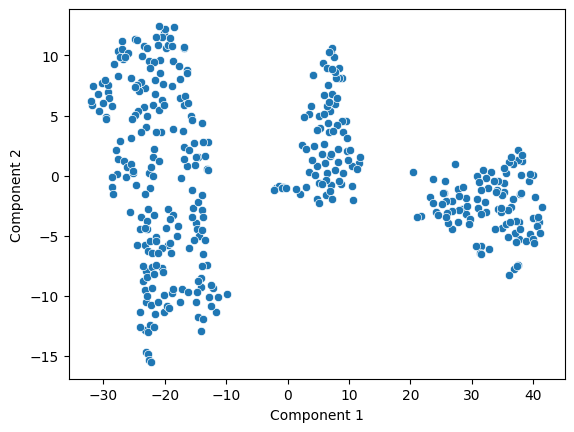

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

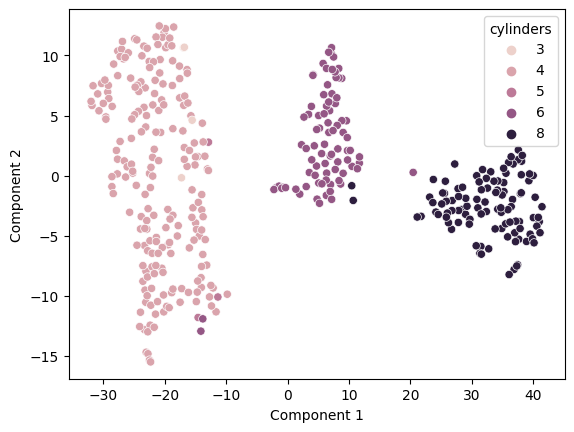

In [ ]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

Observations.

We see the data is seperated and in the differnt components with larger distances between clusters to make the distinctions clear.  

In [ ]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']

    second_component = x['Component 2']

    if (first_component > 0) and (second_component > -5):
        return 'group_1'

    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'

    else:
        return 'group_3'

In [ ]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

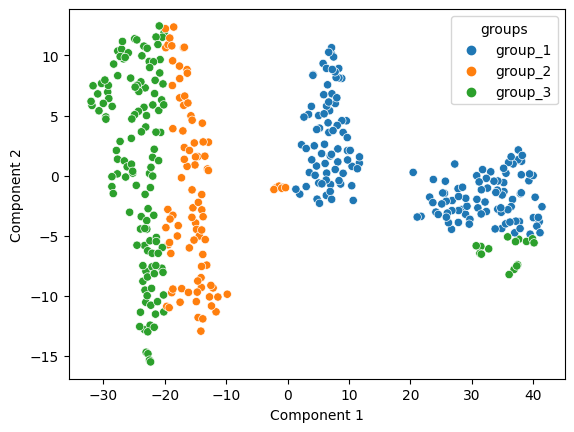

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [ ]:
data['groups'] = data_tsne['groups']

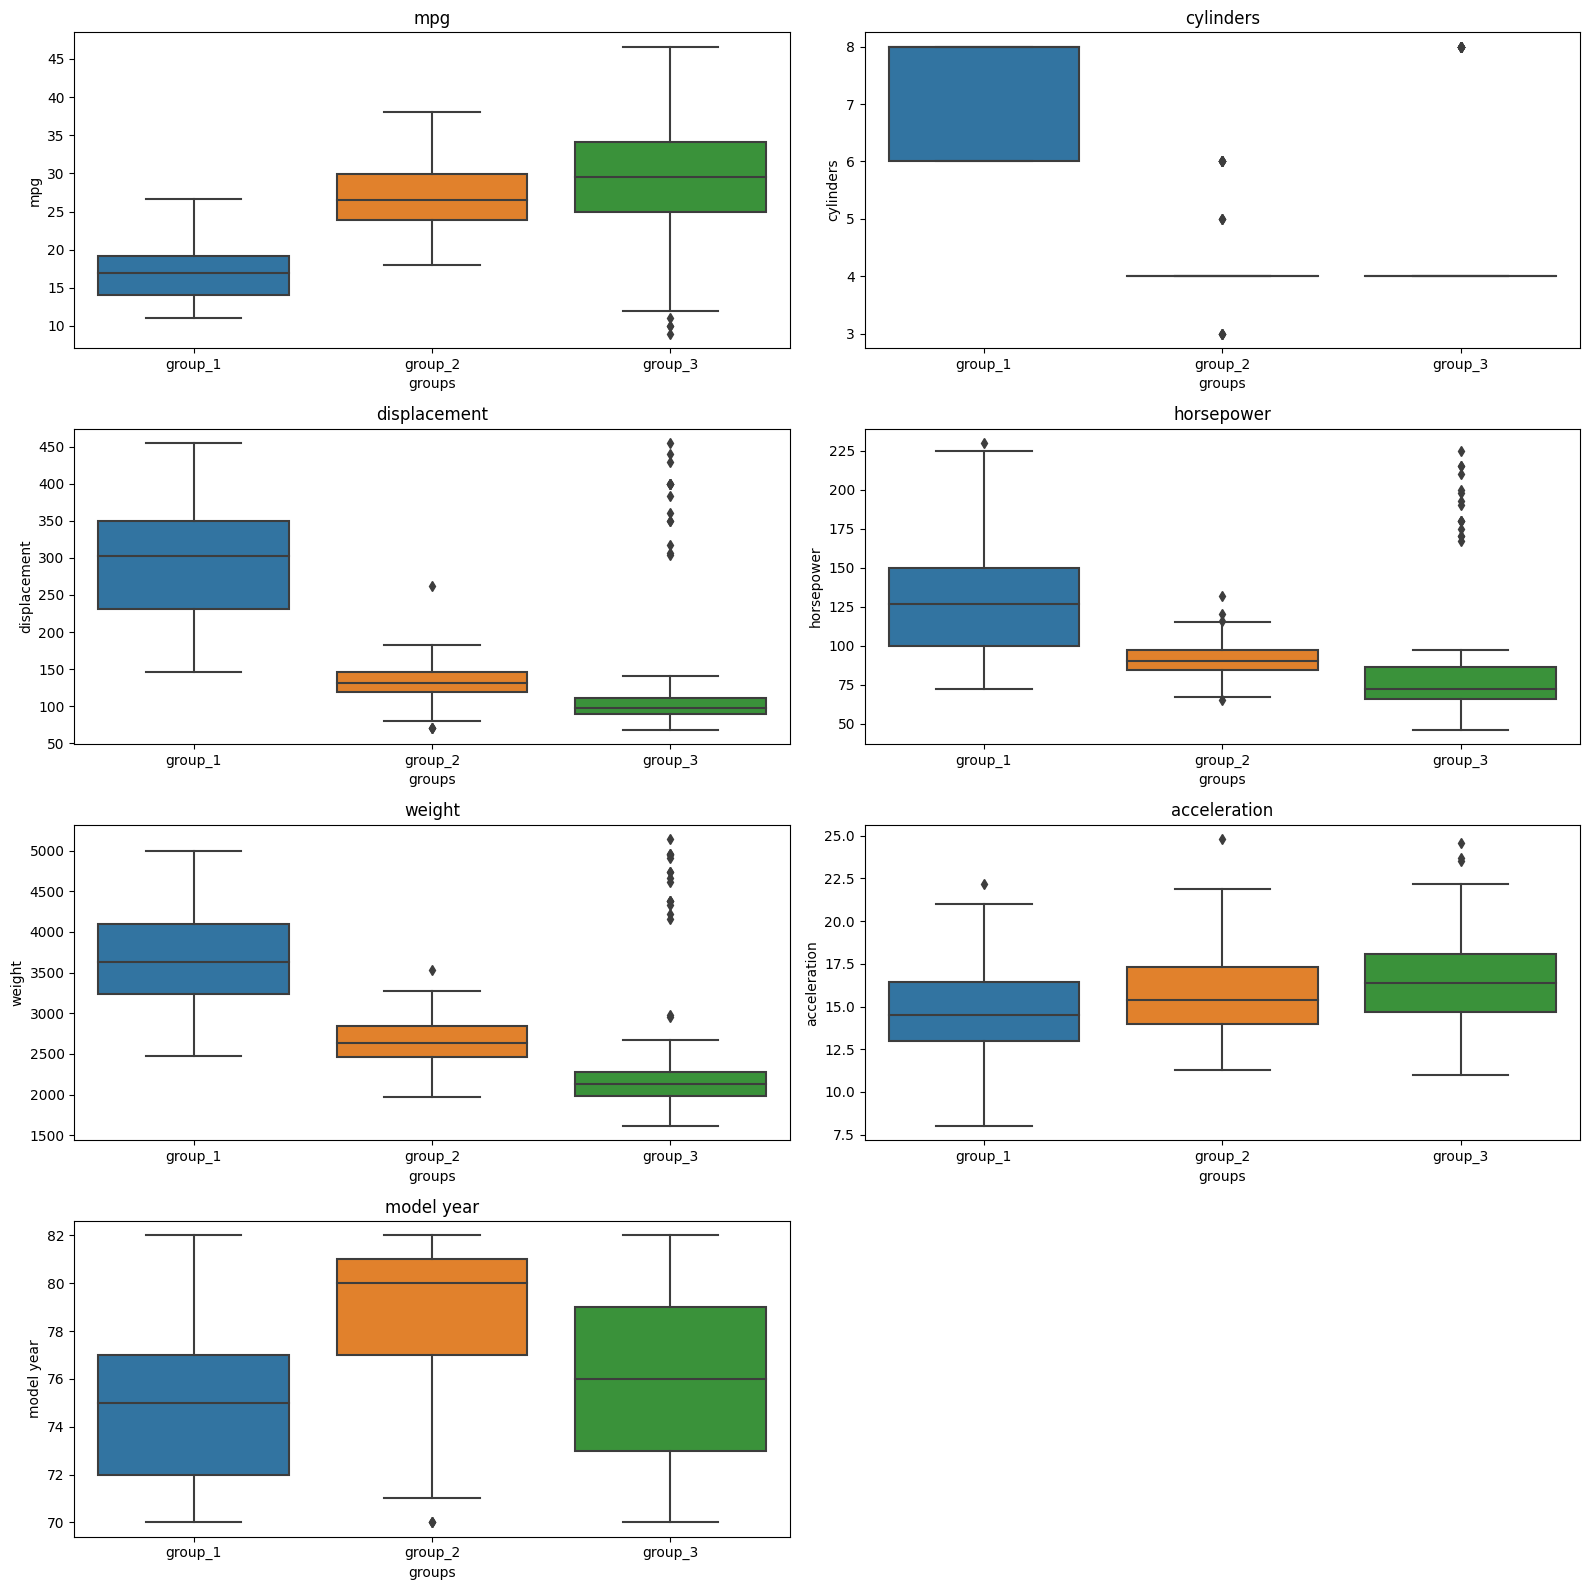

In [ ]:
all_col = data.columns.tolist()

plt.figure(figsize = (16, 16))

for i, variable in enumerate(all_col):
    if i == 7:
        break

    plt.subplot(4, 2, i + 1)

    # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')

    sns.boxplot(x = data['groups'], y = data[variable])
    plt.tight_layout()

    plt.title(variable)

plt.show()

In [ ]:
from pandas._libs.tslibs import dtypes
data= pd.get_dummies(
    data,
    columns= data.select_dtypes(include = ['object', 'category']).columns.tolist(),
    drop_first = True,
    )



In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,groups_group_2,groups_group_3
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Seperate independent variables and the target variable
x = data.drop('mpg', axis=1)
y = data['mpg']

In [ ]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=1)

In [ ]:
#Checking the train and test data
print ('mpg:', X_train.shape)
print ('mpg:', y_test.shape)

mpg: (318, 3)
mpg: (80,)


data is split 80/20

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute MAPE
def mape_score(targets, targets_predictions):
    targets, targets_predictions = np.array(targets), np.array(targets_predictions)
    return np.mean(np.abs((targets - targets_predictions) / targets)) * 100

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target): # Corrected the argument name to 'predictors'
    pred = model.predict(predictors)                      # Predict using the independent variables
    r2 = r2_score(target, pred)                            # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)        # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))      # To compute RMSE
    mae = mean_absolute_error(target, pred)              # To compute MAE
    mape = mape_score(target, pred)                       # To compute MAPE

    # Creating a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            'RMSE': [rmse],
            'MAE': [mae],
            'R-squared': [adjr2],
            'MAPE': [mape],
        }
    )

    return df_perf

In [ ]:
import statsmodels.api as sm

# Statsmodels API does not add a constant by default. We need to add it explicitly.
X_train1 = sm.add_constant(x_train)  # Corrected 'add_cosntant' to 'add_constant'

# Add constant to test data
X_test1 = sm.add_constant(x_test)  # Corrected 'add_cosntant' to 'add_constant'

# Train the model
olsmodel1 = sm.OLS(y_train, X_train1).fit()

# Get the model summary
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     202.7
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          4.23e-118
Time:                        14:00:19   Log-Likelihood:                -816.25
No. Observations:                 318   AIC:                             1651.
Df Residuals:                     309   BIC:                             1684.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -23.4118      4.891     -4.

In [ ]:
lin_reg_test = model_performance_regression(olsmodel1, X_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,MAPE
0,3.493544,2.623339,0.771823,11.257915


In [ ]:
print ('performance on train data:')
model_performance_regression(olsmodel1, X_train1, y_train)

performance on train data:


,RMSE,MAE,R-squared,MAPE
0,3.151563,2.437818,0.835301,11.202654


In [ ]:
print ('performance on test data:')
model_performance_regression(olsmodel1, X_test1, y_test)

performance on test data:


,RMSE,MAE,R-squared,MAPE
0,2.742356,2.057621,0.849356,9.673784


**Observation**

The RMSE and MAE on the testing data (RMSE: 2.742356, MAE: 2.057621) are lower than the values on the training data (RMSE: 3.151563, MAE: 2.437818). Lower values of RMSE and MAE on testing data indicate that the model performs better on unseen data, which is desirable. So,the results suggest that the model is not overfitting.  

The R-squared on the testing data (0.849356) is slightly higher than the value on the training data (0.835301). R-squared measures how well the model explains the variance in the target variable. A higher R-squared on testing data is a good sign, but the difference is not substantial.

The MAPE on the testing data (9.673784) is lower than the value on the training data (11.202654). MAPE measures the percentage error in predictions. Lower MAPE on testing data indicates better performance on unseen data.  It is the average difference between the predicted value and the actual value

The model appears to perform well on both the training and testing data. The performance metrics on the testing data are generally slightly better or comparable to those on the training data. There is no evidence of significant overfitting based on these results.

**Checking for Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)

          Feature         VIF
0       cylinders  172.741980
1    displacement   89.034599
2      horsepower   75.510184
3          weight  156.342178
4    acceleration   74.802708
5      model year  150.062435
6  groups_group_2    5.246585
7  groups_group_3    5.282533


High Multicollinearity:

The VIF values for cylinders, displacement, horsepower, weight, acceleration, and model year are significantly greater than 5, which indicates that these variables are highly correlated with one another. High VIF values like these suggest that these predictors share a large portion of their variance with other predictors, making it difficult to disentangle their individual effects on the target variable.

Low Multicollinearity:

 The VIF values for groups_group_2 and groups_group_3 are relatively low (around 5). Lower VIF values for these variables suggest that they have less multicollinearity and are more independent of other predictors in the mod

In [ ]:
# Dropping variables
x_train2 = X_train1.drop(['groups_group_2'], axis =1)
x_test2 = X_test1.drop(['groups_group_3'], axis =1)

In [ ]:
# Train the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

In [ ]:
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          2.42e-115
Time:                        14:34:15   Log-Likelihood:                -825.63
No. Observations:                 318   AIC:                             1667.
Df Residuals:                     310   BIC:                             1697.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -24.8546      5.018     -4.953      0.000     -34.728     -14.981
cylinders         -0.1698      0.362     -0.469      0.639      -0.882       0.542
displacement       0.0078      0.008      1.008      0.314      -0.007       0.023
horsepower        -0.0209      0.014     -1.497      0.135      -0.048       0.007
weight            -0.0054      0.001     -7.673      0.000      -0.007      -0.004
acceleration      -0.0426      0.104     -0.408      0.683      -0.248       0.163
model year         0.8613      0.056     15.278      0.000       0.750       0.972
groups_group_3     3.4341      0.460      7.463      0.000       2.529       4.340
==============================================================================
Omnibus:                       25.785   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.830
Skew:                           0.603   Prob(JB):                     4.51e-08
Kurtosis:                       4.048   Cond. No.                     8.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation**

R-squared: The R-squared value (0.830) indicates that approximately 83.0% of the variance in the dependent variable (mpg) is explained by the independent variables (predictors) included in the model. A higher R-squared value indicates that the model is better at explaining the variation in the target variable.

In [ ]:
print ('performance on train data:')
model_performance_regression(olsmodel2, x_train2, y_train)

performance on train data:


,RMSE,MAE,R-squared,MAPE
0,3.245871,2.518105,0.825862,11.440162


In [ ]:
print ('performance on test data:')
model_performance_regression(olsmodel2, x_test2, y_test)

performance on test data:


,RMSE,MAE,R-squared,MAPE
0,3.624356,2.872383,0.740579,12.713624


**Observation**

RMSE and MAE: The RMSE and MAE on the test data (RMSE: 3.624356, MAE: 2.872383) are slightly higher than those on the train data (RMSE: 3.245871, MAE: 2.518105). This suggests that the model is making slightly larger errors when predicting the test data, which is expected since the test data is unseen.

R-squared: The R-sq on the test data (0.740579) is lower than that on the train data (0.825862). This indicates that the model explains a lower proportion of the variance in the target variable when applied to the test data. Again, this is normal as the model may not generalize as well to unseen data.

MAPE: The MAPE on the test data (12.713624) is higher than that on the train data (11.440162). MAPE represents the percentage error in predictions. A higher MAPE on the test data indicates slightly larger prediction errors when compared to the train data.

 The model's performance on the test data is slightly worse than on the train data,it is to be expected as the test data is unseen during model training. The differences in the performance metrics are not substantial, suggesting that the model is generalizing reasonably well to unseen data.  The lower R-sq and higher MAPE on the test data indicate that the model's predictive power is somewhat reduced when applied to new observations. It is common for models to perform slightly better on the training data, but the key is to ensure that the drop in performance on the test data is not significant, and the model is still providing reasonable predictions on new data.

**Observation**


const: p-value = 0.000 (less than 0.05) - Statistically significant.

cylinders: p-value = 0.808 (greater than 0.05) - Not statistically significant.
This suggests that these variables do not have enough predictive power and may not be useful in predicting the target variable.

displacement: p-value = 0.110 (greater than 0.05) - Not statistically significant.

weight: p-value = 0.000 (less than 0.05) - P-value- 0.000  Statistically significant.


We observed that the R_squared for the model is 0.77.
This indicates that the weight variable is a significant predictor and has enough predictive power to influence the target variable.  
The R-squared value of 0.77 suggests that approximately 77% of the variance in the target variable is explained by the independent variables (features) included in the model.

 Since the R-squared value is not a p-value, it is not directly comparable to the significance level of 0.05. Instead, it provides an indication of how well the model fits the data and how much of the variance in the target variable is accounted for by the predictors.



##**Checking for Assumptions**



In [ ]:
#Residuals
residual = olsmodel2.resid


In [ ]:
residual.mean()

-2.9802575501786845e-13

#**Test For Normality**


<Axes: ylabel='Count'>

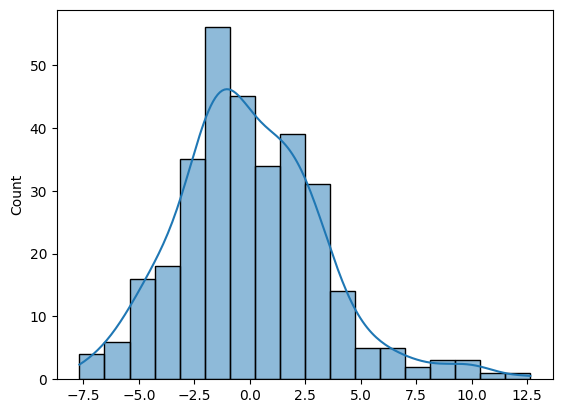

In [ ]:
# Plot histogram of residuals
sns.histplot(residual, kde=True)

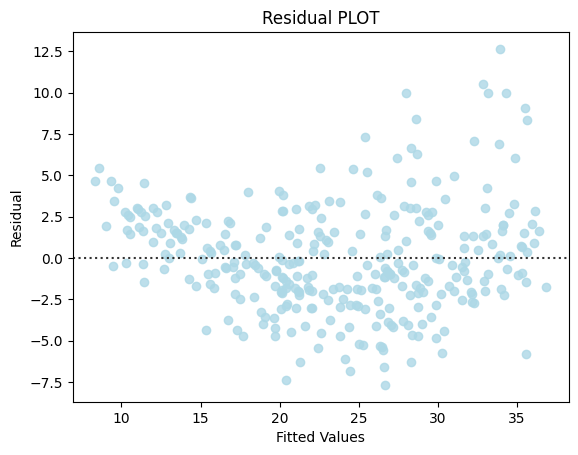

In [ ]:
#predicted values
fitted = olsmodel2.fittedvalues

#Plotting Residuals VS Fitted Values
sns.residplot (x = fitted, y = residual, color = 'lightblue')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title ('Residual PLOT')
plt.show()



The plot shows the predictor variables have a linear relation with the dependent variable and that the fitted values on the plot do not form a strong pattern, they are randomly and uniformly scattered on the x-axis.

#** No Heteroscedasticity**


In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name= ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train2)
lzip(name, test)


[('F statistic', 0.8312859168967378), ('p-value', 0.8713162070247439)]

The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied. The test indicates that the p-value is greater than 0.05, We will fail to reject the null hypothesis  We have captured 87 of the variation in the data.

In [ ]:
coef = olsmodel2.params
coef

const            -24.854641
cylinders         -0.169789
displacement       0.007786
horsepower        -0.020883
weight            -0.005404
acceleration      -0.042589
model year         0.861323
groups_group_3     3.434100
dtype: float64

In [ ]:
# Let us write the equation of the model

Equation = 'mpg'
print(Equation, end='\t')
for i in range(len(coef)):
  print('(', coef[i],')*',coef.index[i], '+', end ='')

mpg	( -24.85464081315505 )* const +( -0.16978914916290477 )* cylinders +( 0.00778613287623245 )* displacement +( -0.020883173549457852 )* horsepower +( -0.00540370321990044 )* weight +( -0.042588865011466755 )* acceleration +( 0.8613228491367726 )* model year +( 3.434099931125377 )* groups_group_3 +

const (Intercept): The coefficient for the intercept term is -24.85464081315505.  value of mpg when all predictor variables are set to zero.

cylinders: The coefficient for cylinders is -0.16978914916290477. It indicates that, on average, for each one-unit increase in the cylinders variable, the mpg is expected to decrease by approximately 0.1698 units, holding all other predictors constant.

displacement: The coefficient for displacement is 0.00778613287623245. It suggests that, on average, for each one-unit increase in displacement, the mpg is expected to increase by approximately 0.0078 units, holding all other predictors constant.

horsepower: The coefficient for horsepower is -0.020883173549457852. It implies that, on average, for each one-unit increase in horsepower, the mpg is expected to decrease by approximately 0.0209 units, holding all other predictors constant.

weight: The coefficient for weight is -0.00540370321990044. It indicates that, on average, for each one-unit increase in weight, the mpg is expected to decrease by approximately 0.0054 units, holding all other predictors constant.

acceleration: The coefficient for acceleration is -0.042588865011466755. It suggests that, on average, for each one-unit increase in acceleration, the mpg is expected to decrease by approximately 0.0426 units, holding all other predictors constant.

model year: The coefficient for model year is 0.8613228491367726. It indicates that, on average, for each one-unit increase in model year, the mpg is expected to increase by approximately 0.8613 units, holding all other predictors constant.

groups_group_3: The coefficient for groups_group_3 is 3.434099931125377. It implies that, on average, if the observation belongs to groups_group_3 (assuming it is a categorical variable with a value of 1 or 0), the mpg is expected to increase by approximately 3.4341 units, holding all other predictors constant.

As the predictor increases, the target variable increases.





**Conclusion and Business Recommendataions**


We have explored building a Linear Regression Model of the AutoMPG problem statement of predicting the likelihood of increasing more vehicle, and have more vehicles with great MPG.  The assumptions of Linear Regression are being satisfied, to make our final model statistically correct to draw inferences from.

*   As years pass after 1973, there has been an increase in mpg

*   const: p-value = 0.000 (less than 0.05) - The test indicates that the p-value is greater than 0.05, We will fail to reject the null hypothesis We have captured 87 of the variation in the data.Statistically significant.   

*   'F statistic', 0.8312859168967378, 'p-value', 0.8713162070247439

*    model year: The coefficient for model year is 0.8613228491367726. It indicates that, on average, for each one-unit increase in model year, the mpg is expected to increase by approximately 0.8613 units, holding all other predictors constant.

*     groups_group_3 (assuming it is a categorical variable with a value of 1 or 0), the mpg is expected to increase by approximately 3.4341 units, holding all other predictors constant



The Auto MPG dataset provides a valuable platform for exploring vehicle performance and fuel consumption relationships. The predictive model developed through this analysis serves as a reliable tool for estimating MPG and understanding the factors influencing it. These findings can facilitate advancements in the automotive industry, enabling the development of more fuel-efficient vehicles and promoting sustainable practice


**Recommendation**
Have the organization to continue to produce vehicle and identify vehicles that demonstrate higher fuel efficiency.

Understand the domain more- the terrain the vehicles are driving.

Include more signifanct predictors to the dataset.

